# Analyzing the Social Web: Scraping Web Pages

We'll review code for scraping web pages into text files and analyzing the text data.

In [ ]:
# Block 1a: Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import json
import math
import collections as cl
import matplotlib.pyplot as plt

!pip install boilerpipe3
from boilerpipe.extract import Extractor 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.6 MB/s 
     |████████████████████████████████| 465 kB 48.2 MB/s 
     |████████████████████████████████| 168 kB 15.5 MB/s 
  Created wheel for boilerpipe3: filename=boilerpipe3-1.3-py3-none-any.whl size=1321063 sha256=7d252d7268fa2ba22f8db3c4e912ec06572c721a7c5905d47614ba8f668bcbb0
  Stored in directory: /root/.cache/pip/wheels/18/0a/a1/4d5543ecb98871a7d2b7d68908fd69942b5865cfacadd49644
  Created wheel for charade: filename=charade-1.0.3-py3-none-any.whl size=187084 sha256=80ca8ad21ec39df8dd4dc344f24064f6fe0fd81f99545dbbd54984f58c1b535c
  Stored in directory: /root/.cache/pip/wheels/fe/de/f4/4b860b7dedbaa21b9953703150121e657634ffef6f137f3af0
Successfully built boilerpipe3 charade


The nltk library (Natural Language ToolKit) has lots of useful methods for analyzing text. THere is much more in the library than we'll have time to discuss, but if you are interested in digital text analysis, I would highly recommend learning more about it.

One useful resource is https://play.google.com/store/books/details?id=KGIbfiiP1i4C

In [ ]:
# Block 1b: More libraries
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop_words = set(nltk.corpus.stopwords.words('english'))
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Block 1c: Another library
!pip install feedparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 5.2 MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=5c2d797fdefc90f5132dfc4e675bd1c214463697b0c41ac08a541d4d3069cc81
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36cebfdddfe059f50e019aa
Successfully built sgmllib3k


You can use the Extractor method to parse an HTML page into text. Here, I'm scraping a single page.

In [ ]:
# Block 2a: Getting text data. Single document.
URL = 'http://www.vatican.va/content/francesco/en/encyclicals/documents/papa-francesco_20201003_enciclica-fratelli-tutti.html' # This page gets updated during the day.
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
FrancisFratelliTutti = extractor.getText()

feedparser is a helpful library for scraping RSS (and Atom) feeds.

Here's a list of feeds from The Washington Post: https://www.washingtonpost.com/discussions/2018/10/12/washington-post-rss-feeds/

In [ ]:
# Block 2b: Getting text data. Feed.
import feedparser as fp
FEED_URL = 'http://feeds.washingtonpost.com/rss/world?itid=lk_inline_manual_42'
#FEED_URL = 'http://feeds.washingtonpost.com/rss/world'
#FEED_URL = 'https://www.boston.com/tag/local-news/?feed=rss'
news_feed = fp.parse(FEED_URL)

In [ ]:
news_feed_links = []
news_news = []
for item in news_feed.entries:
    news_feed_links.append(item.link)

print(news_feed_links)

for page in news_feed_links:
        extractor = Extractor(extractor = 'ArticleExtractor', url = page) 
        news_news.append(extractor.getText())

print(len(news_news))


['https://www.washingtonpost.com/world/2022/11/09/russia-ukraine-war-latest-updates/?utm_source=rss&utm_medium=referral&utm_campaign=wp_world', 'https://www.washingtonpost.com/world/2022/11/09/brittney-griner-russia-penal-colony-transfer/?utm_source=rss&utm_medium=referral&utm_campaign=wp_world', 'https://www.washingtonpost.com/world/2022/11/08/iraq-stephen-troell-millenium-baghdad/?utm_source=rss&utm_medium=referral&utm_campaign=wp_world', 'https://www.washingtonpost.com/world/2022/11/09/russia-ukraine-war-latest-updates/?utm_source=rss&utm_medium=referral&utm_campaign=wp_world', 'https://www.washingtonpost.com/world/2022/11/09/brittney-griner-russia-penal-colony-transfer/?utm_source=rss&utm_medium=referral&utm_campaign=wp_world', 'https://www.washingtonpost.com/world/2022/11/08/iraq-stephen-troell-millenium-baghdad/?utm_source=rss&utm_medium=referral&utm_campaign=wp_world', 'https://www.washingtonpost.com/world/2022/11/02/afghanistan-girls-school-education-taliban/?utm_source=rss&utm

I will switch back and forth between data sources, the single page and the news feed (multiple pages). To avoid having to edit code below, or duplicate code blocks, I use a block to designate the data for analysis. I comment out the data I'm not using.

In [ ]:
# Block 3: Specify the data source
#data = FrancisFratelliTutti # This is the input for the section that follows, which tokenizes the data.
data = news_news # This is the input from the feed parser

In [ ]:
# Block 4: Prepare text data for analysis. Turning words into tokens.
sentences = nltk.sent_tokenize(str(data))
tokens = nltk.word_tokenize(str(data))
print(len(sentences))      # How many sentences in our data?
print(len(tokens))         # How many tokens in our data?
#print(sentences)
#print(sorted(tokens))

1189
34757


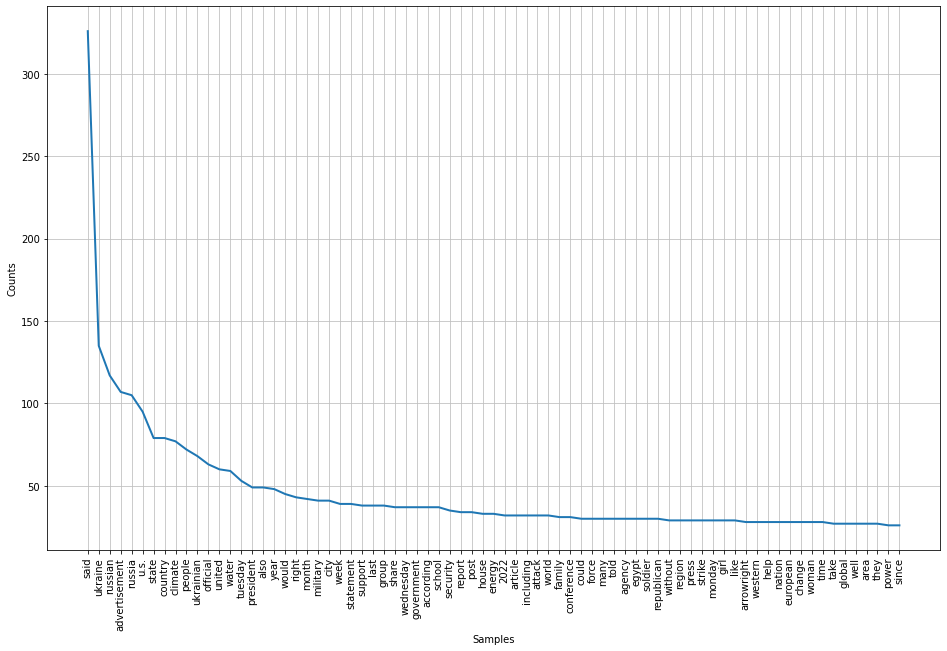

In [ ]:
# Block 5a: Analysis. Token frequency distributions.
wnl = nltk.WordNetLemmatizer()
tokens2 = [t.lower() for t in tokens if len(t) > 3 and t not in en_stop_words] # Create a new list of words in the tweets by excluding the small words, which tend to be function words
lemma = [wnl.lemmatize(t) for t in tokens2]
news_lemma_freq = nltk.FreqDist(lemma)
plt.figure(figsize=(16,10))
news_lemma_freq.plot(75, cumulative=False)
plt.show()

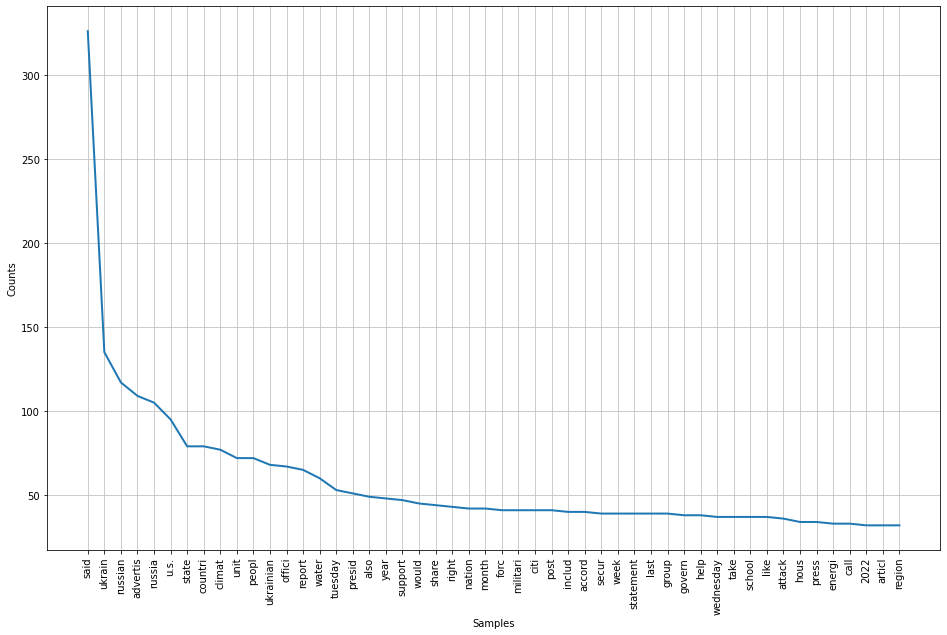

In [ ]:
# Block 5b: Analysis. Token frequency distributions.
# These two techniques are different approaches to generating tokens from words.
porter = nltk.PorterStemmer()
stems = [porter.stem(t) for t in tokens2]
news_stems_freq = nltk.FreqDist(stems)
plt.figure(figsize=(16,10))
news_stems_freq.plot(50, cumulative=False)

In [ ]:
news_stems_freq.tabulate()

                                said                               ukrain                              russian                             advertis                               russia                                 u.s.                                state                              countri                               climat                                 unit                                peopl                            ukrainian                               offici                               report                                water                              tuesday                               presid                                 also                                 year                              support                                would                                share                                right                               nation                                month                                 forc                             militari  

## Content Coding

We'll look at a few ways to code kinds of content in the text data.

In [ ]:
print(len(tokens2))

16802


In [ ]:
# Block 6: Specify the kind of tokens to analyze
words = lemma 
# This variable can change depending on the kind of text input you want (words, lemma, stems)
# This will determine the input for the coding.

In [ ]:
# Block 7a: More analysis. Some examples of content coding
# First, we'll start with the terminal values.

COMFORT = set([
             'comfort', 'cheer', 'console', 'consolation', 'relief', 'solace' 
])

EXCITE = set([
              'excitement', 'excite', 'appetite', 'ardor', 'avid', 'desire', 
              'eagerness', 'enthusiasm', 'hunger', 'keenness', 'fun', 'thrill'
              'exhilarate', 'amuse', 'amusement'
])

ACCOMPLISH = set([
                  'accomplish', 'achieve', 'attain', 'success', 'triumph', 'succeed'
])

PEACE = set([
             'peace', 'calm', 'placid', 'serene', 'serenity', 'tranquillity', 
             'tranquility', 'content'
])

BEAUTY = set([
              'aesthetic', 'esthetic', 'attractive', 'beautiful', 'lovely', 
              'cute', 'gorgeous', 'handsome', 'pretty', 'elegant',
              'beauty'
])

EQUALITY = set([
                'evenhanded', 'fair-minded', 'impartial', 'justice', 'equality', 
                'equity', 'equitable', 'fair'
])

SECURITY = set([  #I've combined 'national security' and 'family security' in the theory
                'protect', 'safe', 'secure', 'security'
])

FREEDOM = set([
               'autonomy', 'independence', 'independent', 'liberty', 'self-determination', 
               'self-governance', 'self-government', 'sovereign', 'freedom', 'free'
])

HAPPINESS = set([
                 'bliss', 'felicity', 'glad', 'joy', 'happy', 'happiness' 
])

HARMONY = set([
               'comity', 'compatibility', 'compatible', 'concord', 'harmony', 'harmonious'
])

LOVE = set([
            'affection', 'attachment', 'devoted', 'devotion', 'passion',
             'fond', 'sweetheart', 'love', 'lover', 'girlfriend', 'boyfriend', 
            'husband', 'wife', 'marriage', 'married', 'wedding', 'honeymoon' 
])

PLEASURE = set([
               'delight', 'enjoyment', 'gladness', 'gratification', 'enjoy',
                'satisfaction', 'delightful', 'pleasure', 'pleasurable',
                'gratifying', 'sex', 'lust'
])

SALVATION = set([
                 'deliverance', 'rescue', 'saved', 'innocent', 'innocence', 'salvation'
                 'redeemed', 'atoned', 'blessed'
])

SELFRESPECT = set([
                   'ego', 'pride', 'prideful', 'self-regard', 'esteem', 'respect'
])

RECOGNITION = set([
                   'celebrity', 'notoriety', 'renown', 'fame', 'famous', 'respected', 
                   'popular', 'recognition', 'award-winning'
])

FRIENDSHIP = set([
                  'brotherhood', 'sisterhood', 'charity', 'cordiality', 
                  'fellowship', 'friendliness', 'goodwill', 'kindly', 
                  'neighborly', 'friend', 'friendship'
])

WISDOM = set([
              'discernment', 'insight', 'perception', 'perceptiveness', 'perceptivity', 
              'sagaciousness', 'sagacity', 'sapience', 'wisdom', 'wise'
])

term_values = ['comfort', 'excite', 'accomplish', 'peace', 'beauty', 'equality', 'security', 
          'freedom', 'happiness', 'harmony', 'love', 'pleasure', 'salvation', 
          'self respect', 'recognition', 'friendship', 'wisdom']

def terminal_count(words):
    # This function computes the frequency of the matches of any term in the values set
    # with tokens in the words set.
    comfort_freq = excite_freq = accomplish_freq = peace_freq = beauty_freq = equality_freq = security_freq = freedom_freq = happy_freq = harmony_freq = love_freq = pleasure_freq = salvation_freq = selfrespect_freq = recognition_freq = friendship_freq = wisdom_freq = 0

    for word in words:
        for term in COMFORT:
            if word.find(term) != -1: #find() is a method of strings that returns the position of the match or -1 if no match was found
                comfort_freq += 1
        for term in EXCITE:
            if word.find(term) != -1:
                accomplish_freq += 1
        for term in ACCOMPLISH:
            if word.find(term) != -1:
                comfort_freq += 1
        for term in PEACE:
            if word.find(term) != -1:
                peace_freq += 1
        for term in BEAUTY:
            if word.find(term) != -1:
                beauty_freq += 1
        for term in EQUALITY:
            if word.find(term) != -1:
                equality_freq += 1
        for term in SECURITY:
            if word.find(term) != -1:
                security_freq += 1
        for term in FREEDOM:
            if word.find(term) != -1:
                freedom_freq += 1
        for term in HAPPINESS:
            if word.find(term) != -1:
                happy_freq += 1
        for term in HARMONY:
            if word.find(term) != -1:
                harmony_freq += 1
        for term in LOVE:
            if word.find(term) != -1:
                love_freq += 1
        for term in PLEASURE:
            if word.find(term) != -1:
                pleasure_freq += 1
        for term in SALVATION:
            if word.find(term) != -1:
                salvation_freq += 1
        for term in SELFRESPECT:
            if word.find(term) != -1:
                selfrespect_freq += 1
        for term in RECOGNITION:
            if word.find(term) != -1:
                recognition_freq += 1
        for term in FRIENDSHIP:
            if word.find(term) != -1:
                friendship_freq += 1
        for term in WISDOM:
            if word.find(term) != -1:
                wisdom_freq += 1

    valuefreqs = [comfort_freq, excite_freq,accomplish_freq, peace_freq, beauty_freq, 
                  equality_freq, security_freq, freedom_freq, happy_freq, harmony_freq, 
                  love_freq, pleasure_freq, salvation_freq, selfrespect_freq, 
                  recognition_freq, friendship_freq, wisdom_freq]

    return valuefreqs


In [ ]:
# Block 7b: More analysis. Some examples of content coding
# Now, the instrumental values

AMBITIOUS = set([
                 'ambitious', 'ambition', 'striving', 'aspiring', 'go-getting', 'hard-driving', 
                 'self-seeking', 'determined', 'aspire', 'enterprising', 'industrious', 'competitive',
                 'ardent', 'assertive', 'opportunistic'
])

BROADMINDED = set([
                   'broad-minded', 'open-minded', 'liberal', 'nonjudgmental', 'tolerant', 
                   'nonconventional', 'nonorthodox', 'nontraditional', 'progressive', 
                   'radical', 'unconventional', 'unorthodox'
])

CAPABLE = set([
               'capable', 'competent', 'qualified', 'suitable', 'accomplished', 
               'adept', 'masterful', 'proficient', 'seasoned', 'skilled', 'skillful', 
               'prepared', 'well-prepared'
])

CHEERFUL = set([
                'cheerful', 'blithe', 'blithesome', 'bright', 'buoyant', 'cheery', 'chipper', 
                'eupeptic', 'gladsome', 'lightsome', 'sunny', 'upbeat', 'winsome'
])

CLEAN = set([
             'clean', 'chaste', 'immaculate', 'pristine', 'spotless', 'unsoiled', 'unstained', 
             'unsullied', 'decent', 'modest', 'healthy'
])

COURAGEOUS = set([
                  'courageous', 'bold', 'brave', 'dauntless', 'fearless', 
                  'gallant', 'greathearted', 'gutsy', 'heroic', 'intrepid', 
                  'lionhearted', 'manful', 'stalwart', 'stout', 'stouthearted', 
                  'undaunted', 'valiant', 'valorous'
])
            
FORGIVING = set([
                 'forgiving', 'caring', 'compassionate', 'considerate', 'cordial', 
                 'doting', 'friendly', 'humane', 'kind', 'understanding', 'warmhearted'
])

HELPFUL = set([
               'helpful', 'advantageous', 'beneficent', 'beneficial', 'benignant', 
               'favorable', 'kindly', 'salutary', 'kind', 'generous'
])

HONEST = set([
              'honest', 'truthful', 'veracious', 'candid', 'forthright', 'believable', 
              'credible', 'trustworthy', 'scrupulous'
])

IMAGINATIVE = set([
                   'imaginative', 'creative', 'arty', 'fanciful', 'clever', 'ingenious', 
                   'innovative', 'inventive', 'artful', 'artsy'
])

INDEPENDENT = set([
                   'independent', 'self-reliant', 'self-sufficient', 'self-supporting', 
                   'self-sustaining', 'autonomous', 'mature', 'sovereign'
])
            
INTELLECTUAL = set([
                    'intellectual', 'smart', 'cerebral', 'eggheaded', 'geeky', 'highbrow',
                    'erudite', 'learned', 'literate', 'polymath', 'scholarly', 'well-read',
                    'academic', 'bookish', 'professorial', 'didactic', 'pedantic', 
                    'educated', 'schooled'
])

LOGICAL = set([
               'logical', 'rational', 'analytical', 'coherent', 'reasonable', 'reasoned'
])

LOVING = set([
              'loving', 'affectionate', 'adoring', 'devoted', 'fond', 'tender', 
              'tenderhearted', 'caring', 'considerate', 'ardent', 'fervent', 
              'impassioned', 'passionate'
])

OBEDIENT = set([
                'obedient', 'amenable', 'biddable', 'compliant', 'conformable', 
                'docile', 'law-abiding', 'submissive', 'tractable', 'acquiescent',
                'yielding', 'tame', 'meek'
])

POLITE = set([
              'polite', 'civil', 'courteous', 'genteel', 'gracious', 'mannerly', 'well-bred',
              'solicitous'
])

RESPONSIBLE = set([
                   'responsible', 'dependable', 'reliable', 'accountable'
])
            
SELFCONTROL = set([
                   'self-control', 'restrained', 'sober', 'reserved', 'reticent', 
                   'levelheaded', 'pragmatic', 'sensible', 'steadfast', 'steady'
])

inst_values = ['ambitious', 'broadminded', 'capable', 'cheerful', 'clean', 'courageous', 
               'forgiving', 'helpful', 'honest', 'imaginative', 'independent', 
               'intellectual', 'logical', 'loving', 'obedient', 'polite', 'responsible', 'selfcontrol']

def instrumental_count(words):
    # This function computes if any of terms in the values sets are matched at least once
    # by tokens in the words set.

    ambitious_freq = broadminded_freq = capable_freq = cheerful_freq = clean_freq = courageous_freq = forgiving_freq = helpful_freq = honest_freq = imaginative_freq = independent_freq = intellectual_freq = logical_freq = loving_freq = obedient_freq = polite_freq = responsible_freq = selfcontrol_freq = 0

    for word in words:
        for term in AMBITIOUS:
            if word.find(term) != -1: #find() is a method of strings that returns the position of the match or -1 if no match was found
                ambitious_freq += 1
        for term in BROADMINDED:
            if word.find(term) != -1:
                broadminded_freq += 1
        for term in CAPABLE:
            if word.find(term) != -1:
                capable_freq += 1
        for term in CHEERFUL:
            if word.find(term) != -1:
                cheerful_freq += 1
        for term in CLEAN:
            if word.find(term) != -1:
                clean_freq += 1
        for term in COURAGEOUS:
            if word.find(term) != -1:
                courageous_freq += 1
        for term in FORGIVING:
            if word.find(term) != -1:
                forgiving_freq += 1
        for term in HELPFUL:
            if word.find(term) != -1:
                helpful_freq += 1
        for term in HONEST:
            if word.find(term) != -1:
                honest_freq += 1
        for term in IMAGINATIVE:
            if word.find(term) != -1:
                imaginative_freq += 1
        for term in INDEPENDENT:
            if word.find(term) != -1:
                independent_freq += 1
        for term in INTELLECTUAL:
            if word.find(term) != -1:
                intellectual_freq += 1
        for term in LOGICAL:
            if word.find(term) != -1:
                logical_freq += 1
        for term in LOVING:
            if word.find(term) != -1:
                loving_freq += 1
        for term in OBEDIENT:
            if word.find(term) != -1:
                obedient_freq += 1
        for term in POLITE:
            if word.find(term) != -1:
                polite_freq += 1
        for term in RESPONSIBLE:
            if word.find(term) != -1:
                responsible_freq += 1
        for term in SELFCONTROL:
            if word.find(term) != -1:
                selfcontrol_freq += 1

    valuefreqs = [ambitious_freq, broadminded_freq, capable_freq, cheerful_freq, clean_freq, 
                  courageous_freq, forgiving_freq, helpful_freq, honest_freq, imaginative_freq, 
                  independent_freq, intellectual_freq, logical_freq, loving_freq, 
                  obedient_freq, polite_freq, responsible_freq, selfcontrol_freq]

    return valuefreqs


In [ ]:
# Block 7c: More analysis. Some examples of content coding
# This is a function to categorize the contents of tweets by illocutionary actions, an aspect of linguistic pragmatics, first proposed
# by J. L. Austin and elaborated on by John Searle. See: https://en.wikipedia.org/wiki/Illocutionary_act

ASSERTIVE_TERMS = set([
                    'am', 'are', 'is', 'was', 'were', 'affirm',
                    'allege', 'assert', 'forecast', 'predict', 'announce',
                    'insist', 'declare', 'state', 'propose',
                    'propound', 'maintain', 'contend', 'avow', 'warrant',
                    'believe', 'argue', 'aver', 'avouch', 'guarantee', 'profess',
                    'plead', 'reason', 'purport', 'claim', 'explain', 'proclaim' 
])
DIRECTIVE_TERMS = set([
                    'command', 'demand', 'forbid', 'recommend', 'order',
                    'decree', 'enact', 'direct', 'enjoin', 'instruct',
                    'compel', 'prohibit', 'dictate', 'require', 'mandate',
                    'require'
])
COMMISSIVE_TERMS = set([
                    'offer', 'promise', 'swear', 'volunteer', 'vow', 'pledge',
                    'attest', 'engage', 'troth'
])
EVALUATIVE_TERMS = set([
                     'thank', 'congratulate', 'pardon', 'excuse', 'blame', 
                     'praise', 'condolence', 'accuse', 'apologize',
                     'commiserate', 'approve', 'admire', 'commend', 'compliment',
                     'applaud',  'object', 'lament', 'condemn', 'admonish',
                     'reprove', 'rebuke', 'chastise', 'impeach', 'denounce',
                     'bless', 'glorify', 'acclaim', 'cheer', 'salute', 'censure',
                     'excoriate', 'chide', 'castigate', 'scold', 'reprehend',
])
ROGATIVE_TERMS = set([
                      'ask', 'inquire', 'question', 'query', 'beg', 'request',
                      'implore', 'beseech', 'petition', 'solicit', 'entreat',
                      'supplicate'
])

illact_labels = ['assertive', 'directive', 'commissive', 'evaluative', 'rogative']

def illact_count(words):
# This function computes the frequency of the matches of any term in the values set
# with tokens in the words set.

    assertive_freq = directive_freq = commissive_freq = evaluative_freq = rogative_freq = 0

    for word in words:
        for term in ASSERTIVE_TERMS:
            if word.find(term) != -1:
                assertive_freq += 1
        for term in DIRECTIVE_TERMS:
            if word.find(term) != -1:
                directive_freq += 1
        for term in COMMISSIVE_TERMS:
            if word.find(term) != -1:
                commissive_freq += 1
        for term in EVALUATIVE_TERMS:
            if word.find(term) != -1:
                evaluative_freq += 1
        for term in ROGATIVE_TERMS:
            if word.find(term) != -1:
                rogative_freq += 1

    illacts_freqs = [assertive_freq, directive_freq, commissive_freq, evaluative_freq, rogative_freq]

    return illacts_freqs



### WordNet

Let's look at the structure of WordNet data types.

In [ ]:
# Block 1d: One more library
from nltk.corpus import wordnet as wn


There are many ways to use WordNet. Here I'm showing two. The first uses synonyms of keywords to do coding. The second uses synonyms + antonyms.

In [ ]:
# Block 7d: More analysis. Some examples of content coding
data_keywords = set(['crisis', 'danger', 'violence', 'conflict'])
data_labels = list(data_keywords)
keywords = {}

for term in data_keywords:
    for synset in wn.synsets(term):
        keywords[term] = synset.lemma_names()

keywords_keys = list(keywords.keys())
keyword_counts = {}

def wn_keyword_count(words):
    for key in keywords_keys:
        keyword_counts[key] = 0
    
    for word in words:
        for key in keywords_keys:
            for term in keywords[key]:
                if word.find(term) != -1:
                    keyword_counts[key] += 1

    return keyword_counts       


In [ ]:
# Block 7e: More analysis. Some examples of content coding
data_keywords = ('crisis', 'danger', 'violence', 'conflict')
data_labels = list(data_keywords)

first_synonyms = []
first_antonyms = []

for syn in wn.synsets(data_keywords[0]):
    for l in syn.lemmas():
        first_synonyms.append(l.name())
        if l.antonyms():
            first_antonyms.append(l.antonyms()[0].name())

if len(first_synonyms) > 0:
    if len(first_antonyms) > 0:
        first_terms = first_synonyms + first_antonyms
    elif len(first_antonyms) == 0: 
        first_terms = first_synonyms
else: first_terms = [data_keywords[0]]

second_synonyms = []
second_antonyms = []

for syn in wn.synsets(data_keywords[1]):
    for l in syn.lemmas():
        second_synonyms.append(l.name())
        if l.antonyms():
            second_antonyms.append(l.antonyms()[0].name())

if len(second_synonyms) > 0:
    if len(second_antonyms) > 0:
        second_terms = second_synonyms + second_antonyms
    elif len(second_antonyms) == 0: 
        second_terms = second_synonyms
else: second_terms = [data_keywords[1]]

third_synonyms = []
third_antonyms = []

for syn in wn.synsets(data_keywords[2]):
    for l in syn.lemmas():
        third_synonyms.append(l.name())
        if l.antonyms():
            third_antonyms.append(l.antonyms()[0].name())

if len(third_synonyms) > 0:
    if len(third_antonyms) > 0:
        third_terms = third_synonyms + third_antonyms
    elif len(third_antonyms) == 0: 
        third_terms = third_synonyms
else: third_terms = [data_keywords[2]]

fourth_synonyms = []
fourth_antonyms = []

for syn in wn.synsets(data_keywords[3]):
    for l in syn.lemmas():
        fourth_synonyms.append(l.name())
        if l.antonyms():
            fourth_antonyms.append(l.antonyms()[0].name())

if len(fourth_synonyms) > 0:
    if len(fourth_antonyms) > 0:
        fourth_terms = fourth_synonyms + fourth_antonyms
    elif len(fourth_antonyms) == 0: 
        fourth_terms = fourth_synonyms
else: fourth_terms = [data_keywords[3]]

first_terms = set(first_terms)
second_terms = set(second_terms)
third_terms = set(third_terms)
fourth_terms = set(fourth_terms)

print(first_terms)
print(second_terms)
print(third_terms)
print(fourth_terms)

def wn_keyword_count2(words):
    first_freq = second_freq = third_freq = fourth_freq = 0

    for word in words:
        for term in first_terms:
            if word.find(term) != -1:
                first_freq += 1

        for term in second_terms:
            if word.find(term) != -1:
                second_freq += 1

        for term in third_terms:
            if word.find(term) != -1:
                third_freq += 1

        for term in fourth_terms:
            if word.find(term) != -1:
                fourth_freq += 1


    theme_freqs = [first_freq, second_freq, third_freq, fourth_freq]

    return theme_freqs        

{'crisis'}
{'risk', 'safety', 'peril', 'danger'}
{'violence', 'vehemence', 'wildness', 'ferocity', 'furiousness', 'fierceness', 'fury', 'force'}
{'struggle', 'contravene', 'engagement', 'battle', 'infringe', 'run_afoul', 'difference', 'dispute', 'difference_of_opinion', 'fight', 'conflict'}


In [ ]:
# Block 8: Results
print(len(words))
print(words)

results0 = pd.Series(terminal_count(words), index=term_values)
results1 = pd.Series(instrumental_count(words), index=inst_values)
results2 = pd.Series(illact_count(words), index=illact_labels)
results3 = pd.Series(wn_keyword_count(words), index=data_labels)
results4 = pd.Series(wn_keyword_count2(words), index=data_labels)

print(results0)
print(results1)
print(results2)
print(results3)
print(results4)

16802
['updated', 'november', '2022', '8:14', 'a.m.', 'est|published', 'november', '2022', '3:31', 'a.m.', 'kyiv', 'resident', 'igor', 'make', 'using', 'camping', 'stove', 'apartment', 'scheduled', 'power', 'ukraine', 'nov.', '2022', 'ram/photographer', 'ram/getty', 'image', 'listen', 'gift', 'article', 'share', 'wnba', 'star', 'brittney', 'griner', 'transferred', 'russian', 'penal', 'colony', 'lawyer', 'said', 'wednesday', 'russian', 'court', 'rejected', 'appeal', '9½-year', 'prison', 'sentence', 'detained', 'russia', 'drug', 'charge', 'since', 'february', 'arrowright', 'detention', 'near', 'moscow', 'exacerbated', 'u.s.-russia', 'tension', 'already', 'peak', 'ukraine', 'attempt', 'secure', 'deal', 'release', 'biden', 'administration', 'said', 'made', 'significant', 'offer', 'russian', 'accused', 'kremlin', 'lack', 'good', 'faith', 'negotiation.', 'here', 'latest', 'ripple', 'effect', 'across', 'globe', 'development', 'griner', 'lawyer', 'information', 'exact', 'whereabouts', 'final',

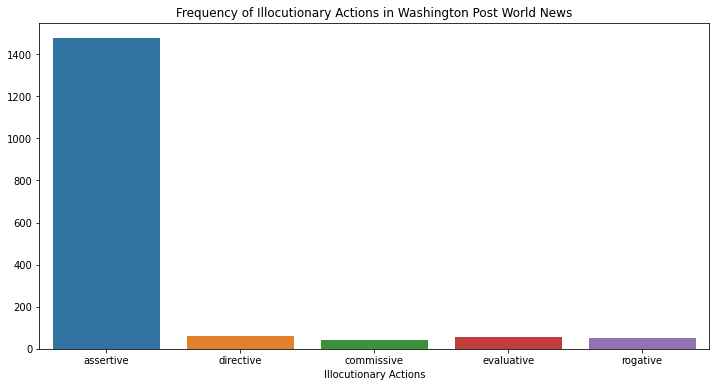

In [ ]:
# Block 9a: Visualization
plt.figure(figsize=(12,6))
plt.xlabel('Illocutionary Actions')
plt.title('Frequency of Illocutionary Actions in Washington Post World News')
sb.barplot(x=illact_labels, y=results2, linewidth=5)
plt.show()

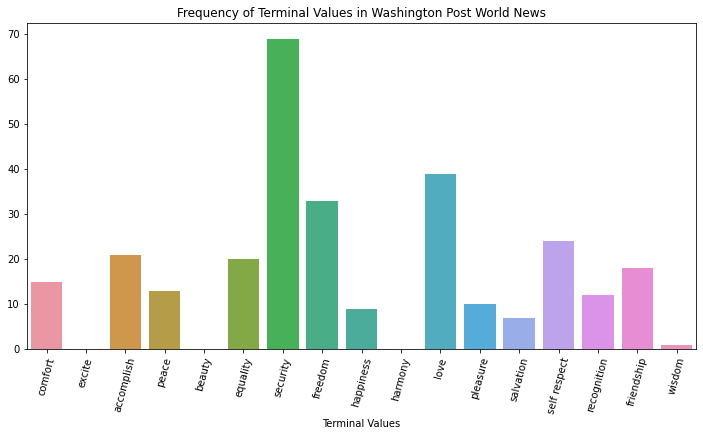

In [ ]:
# Block 9b: Visualization
plt.figure(figsize=(12,6))
plt.xlabel('Terminal Values')
plt.title('Frequency of Terminal Values in Washington Post World News')
plt.xticks(rotation=75)
sb.barplot(x=term_values, y=results0, linewidth=5)
plt.show()

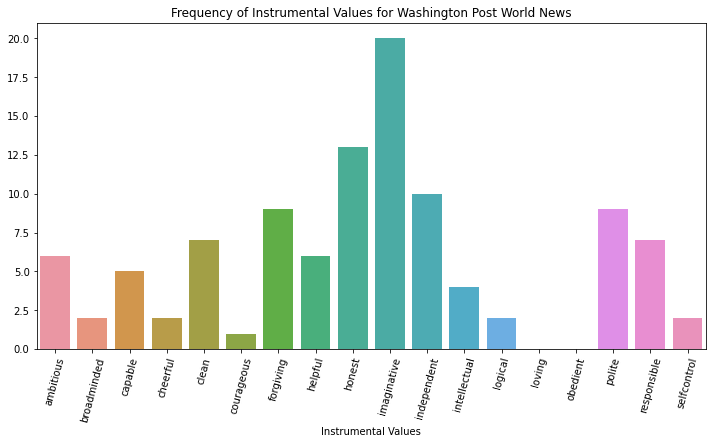

In [ ]:
# Block 9c: Visualization
plt.figure(figsize=(12,6))
plt.xlabel('Instrumental Values')
plt.title('Frequency of Instrumental Values for Washington Post World News')
plt.xticks(rotation=75)
sb.barplot(x=inst_values, y=results1, linewidth=5)
plt.show()

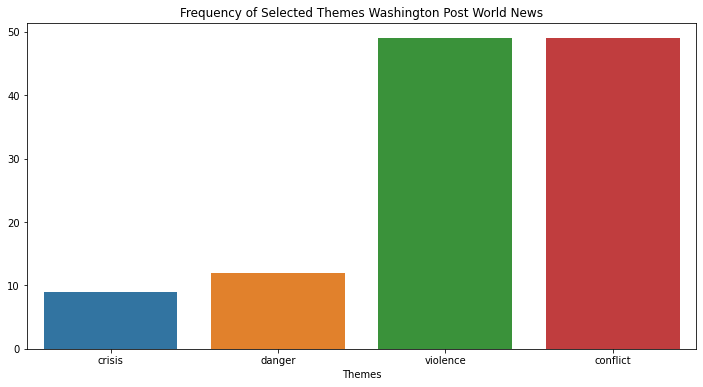

In [ ]:
# Block 9d: Visualization
plt.figure(figsize=(12,6)) # These measurements are in inches.
plt.xlabel('Themes')
plt.title('Frequency of Selected Themes Washington Post World News')
sb.barplot(x=data_labels, y=results4)
plt.show()

## Activity

Identify a news source and scrape a news story as data. Identify a kind of content coding to apply to the story. Visualize the results.

### Bonus Activity

How would you solve the multiple-counting problem using WordNet synonyms and antonyms?